<a href="https://colab.research.google.com/github/rujool11/ML-learning/blob/main/03_CNN_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Convolutional Neural Networks and Computer Vision**

### **Get data**


In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2023-10-08 07:12:32--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.31.207, 142.250.145.207, 74.125.143.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.31.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.2’

pizza_steak.zip.2   100%[===================>] 104.47M  33.4MB/s    in 3.1s    

2023-10-08 07:12:35 (33.4 MB/s) - ‘pizza_steak.zip.2’ saved [109540975/109540975]



In [ ]:
# data has been proprocessed to be in this format (test and train folder, with images in subfolders steak and pizza in each)


In [ ]:
# inspect the data, for computer vision projects, usually means visualizing the data
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

for dirpath,dirnames,filenames in os.walk('pizza_steak'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} files in {dirpath}')

There are 2 directories and 0 files in pizza_steak
There are 2 directories and 0 files in pizza_steak/test
There are 0 directories and 250 files in pizza_steak/test/pizza
There are 0 directories and 250 files in pizza_steak/test/steak
There are 2 directories and 0 files in pizza_steak/train
There are 0 directories and 750 files in pizza_steak/train/pizza
There are 0 directories and 750 files in pizza_steak/train/steak


In [ ]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Oct  8 06:30 .
drwxr-xr-x 1 root root 4096 Oct  8 07:12 ..
drwxr-xr-x 4 root root 4096 Oct  8 06:30 test
drwxr-xr-x 4 root root 4096 Oct  8 06:30 train


In [ ]:
num_train_steak = len(os.listdir('pizza_steak/train/steak'))
num_train_steak

750

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
# creating a list of class_names (with names as names of directories in train directory)

class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [ ]:
#visualize images

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class # setup target directory

    random_image = random.sample(os.listdir(target_folder), 1) # randomly sample 1 item in directory
    print(random_image)

    img_path = target_folder + '/' + random_image[0]
    print(img_path)
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off');
    print(f'Image Shape: {img.shape}')

    return img


['2827938.jpg']
pizza_steak/train/pizza/2827938.jpg
Image Shape: (512, 384, 3)


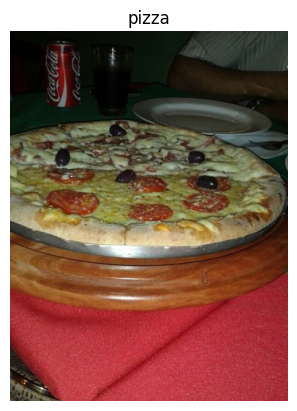

In [ ]:
img = view_random_image(target_dir='pizza_steak/train/',
                        target_class='pizza')

In [ ]:
img

array([[[  4,   5,   0],
        [  4,   5,   0],
        [  5,   6,   1],
        ...,
        [ 48,  58,  50],
        [ 48,  58,  50],
        [ 42,  52,  44]],

       [[  4,   5,   0],
        [  5,   6,   1],
        [  5,   6,   1],
        ...,
        [ 48,  58,  50],
        [ 48,  58,  50],
        [ 44,  54,  46]],

       [[  5,   6,   1],
        [  5,   6,   1],
        [  5,   6,   1],
        ...,
        [ 46,  56,  48],
        [ 45,  55,  47],
        [ 45,  55,  47]],

       ...,

       [[ 96,  75,  46],
        [ 91,  71,  44],
        [ 89,  72,  46],
        ...,
        [155,  35,  45],
        [154,  34,  46],
        [163,  43,  55]],

       [[113,  90,  59],
        [ 90,  69,  38],
        [ 91,  71,  44],
        ...,
        [156,  36,  48],
        [148,  28,  40],
        [154,  34,  46]],

       [[123, 100,  68],
        [ 94,  73,  42],
        [106,  85,  56],
        ...,
        [173,  53,  65],
        [163,  43,  55],
        [166,  46,  58]]

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 384, 3), dtype=uint8, numpy=
array([[[  4,   5,   0],
        [  4,   5,   0],
        [  5,   6,   1],
        ...,
        [ 48,  58,  50],
        [ 48,  58,  50],
        [ 42,  52,  44]],

       [[  4,   5,   0],
        [  5,   6,   1],
        [  5,   6,   1],
        ...,
        [ 48,  58,  50],
        [ 48,  58,  50],
        [ 44,  54,  46]],

       [[  5,   6,   1],
        [  5,   6,   1],
        [  5,   6,   1],
        ...,
        [ 46,  56,  48],
        [ 45,  55,  47],
        [ 45,  55,  47]],

       ...,

       [[ 96,  75,  46],
        [ 91,  71,  44],
        [ 89,  72,  46],
        ...,
        [155,  35,  45],
        [154,  34,  46],
        [163,  43,  55]],

       [[113,  90,  59],
        [ 90,  69,  38],
        [ 91,  71,  44],
        ...,
        [156,  36,  48],
        [148,  28,  40],
        [154,  34,  46]],

       [[123, 100,  68],
        [ 94,  73,  42],
        [106,  85,  56],
        ...,
        [173,  53,  6

In [ ]:
img.shape # height, width, color channels

(512, 384, 3)

In [ ]:
# all values between 0 and 1 (to normalize for better training)
img/255.

array([[[0.01568627, 0.01960784, 0.        ],
        [0.01568627, 0.01960784, 0.        ],
        [0.01960784, 0.02352941, 0.00392157],
        ...,
        [0.18823529, 0.22745098, 0.19607843],
        [0.18823529, 0.22745098, 0.19607843],
        [0.16470588, 0.20392157, 0.17254902]],

       [[0.01568627, 0.01960784, 0.        ],
        [0.01960784, 0.02352941, 0.00392157],
        [0.01960784, 0.02352941, 0.00392157],
        ...,
        [0.18823529, 0.22745098, 0.19607843],
        [0.18823529, 0.22745098, 0.19607843],
        [0.17254902, 0.21176471, 0.18039216]],

       [[0.01960784, 0.02352941, 0.00392157],
        [0.01960784, 0.02352941, 0.00392157],
        [0.01960784, 0.02352941, 0.00392157],
        ...,
        [0.18039216, 0.21960784, 0.18823529],
        [0.17647059, 0.21568627, 0.18431373],
        [0.17647059, 0.21568627, 0.18431373]],

       ...,

       [[0.37647059, 0.29411765, 0.18039216],
        [0.35686275, 0.27843137, 0.17254902],
        [0.34901961, 0

### **End to end model**

load image, preprocess our image
build, compile and fit the cnn

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

# preprocess data to get pixel values between 0 and 1
train_datagen = ImageDataGenerator(rescale=1/255.)
valid_datagen = ImageDataGenerator(rescale=1/255.)

train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

# import data from directory and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42) # very commonly used values

test_data = valid_datagen.flow_from_directory(test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             seed=42)

# flow from directory creates classes automatically for su
# build a CNN model (Tiny VGG architecture), look up different architectures

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                            padding='valid'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy']) # this is still a binary classification task

history_1 = model_1.fit(train_data,
            epochs=10,
            steps_per_epoch=len(train_data)) # flow from directory creates labels automatically, so no need to pass X and y



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/10
47/47 [==============================] - 6s 88ms/step - loss: 0.5688 - accuracy: 0.6953
Epoch 2/10
47/47 [==============================] - 5s 101ms/step - loss: 0.4493 - accuracy: 0.7887
Epoch 3/10
47/47 [==============================] - 5s 97ms/step - loss: 0.4000 - accuracy: 0.8193
Epoch 4/10
47/47 [==============================] - 4s 89ms/step - loss: 0.3556 - accuracy: 0.8460
Epoch 5/10
47/47 [==============================] - 5s 112ms/step - loss: 0.2615 - accuracy: 0.8953
Epoch 6/10
47/47 [==============================] - 5s 98ms/step - loss: 0.1998 - accuracy: 0.9247
Epoch 7/10
47/47 [==============================] - 5s 100ms/step - loss: 0.1339 - accuracy: 0.9547
Epoch 8/10
47/47 [==============================] - 4s 90ms/step - loss: 0.0882 - accuracy: 0.9713
Epoch 9/10
47/47 [==============================] - 5s 109ms/step - loss: 0.0452 - accuracy: 0.9893
Epoch 10/10
47/47 [===

In [ ]:
len(train_data) # 1500/32 = 47 (approx.), this is because we have a batch size of 32
# thus, we have 47 batches of 32 images and their labels
# this makes calculation easier without running out of memory
# thus steps per epoch = 47

47

In [ ]:
# GPU acceleration used to make fitting faster
model_1.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_33 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_35 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                

In [ ]:
# this can also be done with a regular neural network, but the accuracy wont be as good and we will need a lot more params

### **1. Visualize Data**

['947877.jpg']
pizza_steak/train/steak/947877.jpg
Image Shape: (512, 512, 3)
['1248346.jpg']
pizza_steak/train/pizza/1248346.jpg
Image Shape: (306, 512, 3)


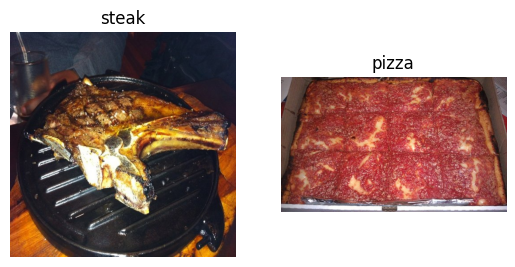

In [ ]:
# visualize data

plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image('pizza_steak/train/','steak')
plt.subplot(1,2,2)
pizza_img = view_random_image('pizza_steak/train/','pizza')


### **2. Preprocess Data**

turn data into batches (small subset of data)

this is because all of the images may not fit into the processor memory (GPU in this case)

also, trying to learn all the images at once may not result in good learning

32 is a commonly used batch size

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


In [ ]:
train_data = train_datagen.flow_from_directory(directory=train_dir, #target directory
                                               target_size=(224,224), # target size of image
                                               class_mode='binary', # type of classification
                                               batch_size=32) # target batch size

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images, labels = train_data.next() # get 'next' batch images and labels
len(images), len(labels)

(32, 32)

In [ ]:
images[:2], images[0].shape

(array([[[[0.6431373 , 0.5411765 , 0.39607847],
          [0.6431373 , 0.5294118 , 0.4039216 ],
          [0.6431373 , 0.52156866, 0.40784317],
          ...,
          [0.0509804 , 0.03137255, 0.05882353],
          [0.05490196, 0.03529412, 0.0627451 ],
          [0.05490196, 0.03529412, 0.0627451 ]],
 
         [[0.64705884, 0.54509807, 0.40784317],
          [0.6431373 , 0.5294118 , 0.4039216 ],
          [0.6431373 , 0.52156866, 0.40784317],
          ...,
          [0.04705883, 0.02745098, 0.0509804 ],
          [0.04705883, 0.02745098, 0.0509804 ],
          [0.05490196, 0.03529412, 0.0627451 ]],
 
         [[0.6392157 , 0.5254902 , 0.40000004],
          [0.6509804 , 0.5372549 , 0.41176474],
          [0.63529414, 0.5137255 , 0.40000004],
          ...,
          [0.05490196, 0.03529412, 0.0509804 ],
          [0.05882353, 0.03921569, 0.0627451 ],
          [0.0509804 , 0.03137255, 0.05490196]],
 
         ...,
 
         [[0.43137258, 0.19215688, 0.11764707],
          [0.43921

In [ ]:

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, MaxPool2D, Conv2D, Activation
from tensorflow.keras import Sequential



In deep learning, there are a lot of architectures you can use. Start with a simpler model, see if it works. Then imporve on that

eg. looking up which is performing the best in your field at any given time

In [ ]:
#creating the model, first create baseline
model_2 = Sequential([
    Conv2D(filters=10, # no. of sliding windows, higher = more complex
           kernel_size=3, # size of sliding windows
           strides=1, # size of steps that sliding window takes, usually 1 (default), can be set to 2 if input isnt informationally dense
           padding='valid', # 'valid' compresses output shape, remains the same if set to 'same'
           activation='relu',
           input_shape=(224,224,3)),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'), # flattens output of previous models to go to the Dense layer
    Flatten(),
    Dense(1, input_shape=(1,), activation='sigmoid')
])

# giving error, check later


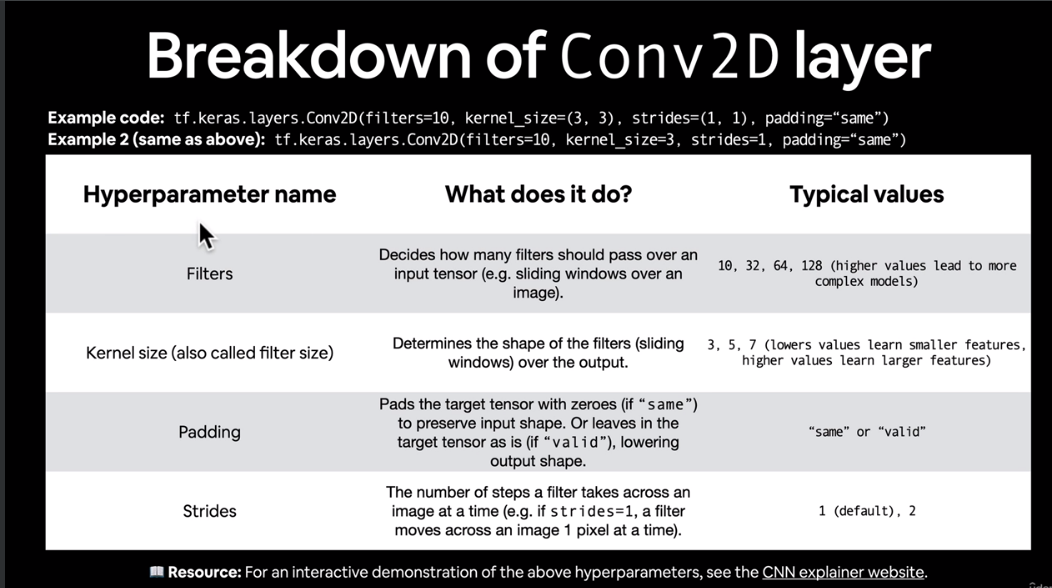

In [ ]:
# compile mode
model_2.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

model_2.summary() # output shape 222 since padding valid, gets slightly smaller at every convolutional layer

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_69 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_70 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_71 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_16 (Flatten)        (None, 475240)            0         
                                                                 
 dense_20 (Dense)            (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
len(train_data), len(test_data) # no. of batches, both are combinations of data and labels

(47, 16)

In [ ]:
# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 152ms/step - loss: 0.8961 - accuracy: 0.5340 - val_loss: 0.6725 - val_accuracy: 0.6100
Epoch 2/5
47/47 [==============================] - 7s 145ms/step - loss: 0.5594 - accuracy: 0.7120 - val_loss: 0.4890 - val_accuracy: 0.7500
Epoch 3/5
47/47 [==============================] - 5s 114ms/step - loss: 0.3447 - accuracy: 0.8660 - val_loss: 0.5218 - val_accuracy: 0.7520
Epoch 4/5
47/47 [==============================] - 7s 152ms/step - loss: 0.1720 - accuracy: 0.9387 - val_loss: 0.4871 - val_accuracy: 0.7840
Epoch 5/5
47/47 [==============================] - 6s 137ms/step - loss: 0.0644 - accuracy: 0.9813 - val_loss: 0.5702 - val_accuracy: 0.7820
